In [1]:
#!pip install --upgrade pip

In [2]:
#!pip install torch
#!pip install torchvision

In [3]:
#!pip install torchsummary

In [3]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import math
import torch        # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
from zipfile import ZipFile
%matplotlib inline

In [5]:
#!pip install patool 

In [6]:
#!pip install unzip

In [7]:
#!pip install zipfile36

In [8]:
#with ZipFile("/Users/ananya/Documents/GitHub/Krishisewa/archive.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    #zObject.extractall(
       # path="/Users/ananya/Documents/GitHub/Krishisewa")

# LOADING THE DATASET

In [4]:

train_dir = "/Users/ananya/Documents/GitHub/Krishisewa/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = "/Users/ananya/Documents/GitHub/Krishisewa/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
diseases = os.listdir(train_dir)

In [5]:
print(diseases)

['Strawberry___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___healthy', 'Tomato___Target_Spot', 'Peach___healthy', 'Potato___Late_blight', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Leaf_Mold', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Apple_scab', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Peach___Bacterial_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___B

In [6]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


The above cell extract the number of unique plants and number of unique diseases

In [7]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [13]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

# number of unique plants
print("Number of plants: {}".format(len(plants)))

Unique Plants are: 
['Strawberry', 'Grape', 'Potato', 'Blueberry', 'Corn_(maize)', 'Tomato', 'Peach', 'Pepper,_bell', 'Orange', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Squash', 'Soybean']
Number of plants: 14


In [14]:
print("Number of Diseases: ".format(NumberOfDiseases))

Number of Diseases: 


In [8]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Strawberry___healthy,1824
Grape___Black_rot,1888
Potato___Early_blight,1939
Blueberry___healthy,1816
Corn_(maize)___healthy,1859
Tomato___Target_Spot,1827
Peach___healthy,1728
Potato___Late_blight,1939
Tomato___Late_blight,1851
Tomato___Tomato_mosaic_virus,1790


Visualizing the above on a graph

Text(0.5, 1.0, 'Images per each class of plant disease')

<Figure size 1800x1080 with 0 Axes>

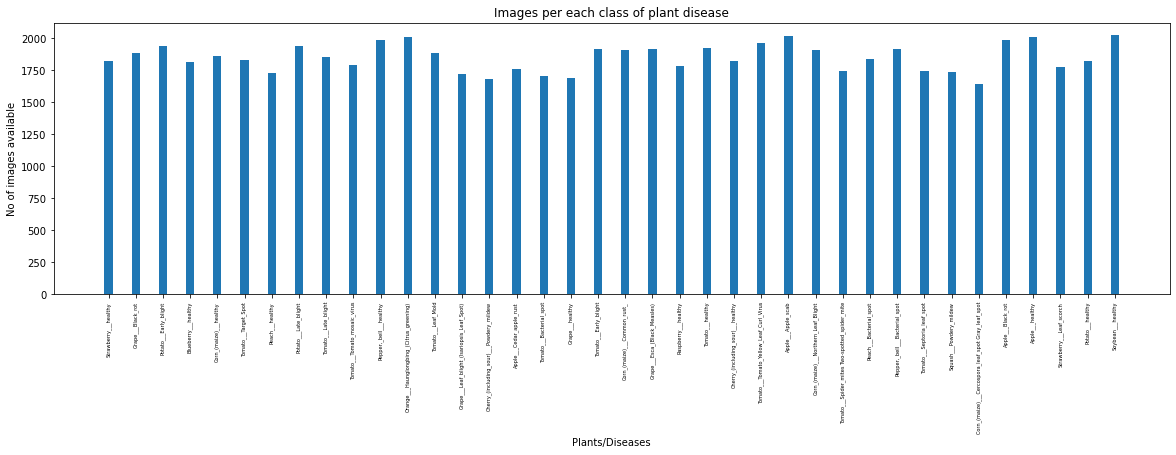

In [9]:
# plotting number of images available for each disease
plt.figure(figsize = (25,15))
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [10]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


#  Data Preparation for Training 

In [11]:
# datasets for validation and training
from torchvision.datasets import ImageFolder
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

In [12]:
# Image Shape
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [13]:
# total number of classes in train set
len(train.classes)

38

In [14]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Viewing Images from training dataset 

In [ ]:
# random images 
show_image(*train[0])



In [ ]:
show_image(*train[6000])

In [ ]:
show_image(*train[2500])

In [15]:
# Setting the seed value
random_seed = 8
torch.manual_seed(random_seed)

# setting the batch size( input size of CNN)
batch_size = 33

In [16]:
# DataLoaders for training and validation( loads data in batch sizes , used for very large data , shuffle to randomise 
# inputs per batch)
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

# MODELLING 

In [32]:
# helper fucntions for cpu and gpu
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("mps")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [33]:
device = get_default_device()
device

device(type='mps')

In [49]:
img.device


device(type='cpu')

In [50]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='mps', index=0)

In [34]:
# Moving data into GPU after generating it from Devuce Data Loader
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

# RESNET

In [35]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [66]:
import torch.nn as nn
import torch.nn.functional as F
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
      '''calculate loss for a batch of training data'''

      images, labels = batch 
      out = self(images)                  # Generate predictions
      loss = F.cross_entropy(out, labels) # Calculate loss
      return loss
    
    def validation_step(self, batch):
      '''calculate loss for a batch of validation data'''
      images, labels = batch 
      out = self(images)                    # Generate predictions
      loss = F.cross_entropy(out, labels)   # Calculate loss
      acc = accuracy(out, labels)           # Calculate accuracy
      return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [67]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

In [68]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

In [77]:
# defining the model and moving it to the GPU
model = to_device(ResNet9(3, len(train.classes)), device) 
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [78]:
model.conv1[0].weight

Parameter containing:
tensor([[[[ 0.1785,  0.0555, -0.1740],
          [-0.1691,  0.0229,  0.0010],
          [-0.1823, -0.0603,  0.0003]],

         [[ 0.0023,  0.0082,  0.1212],
          [ 0.0019,  0.1457, -0.0506],
          [ 0.0074, -0.0801, -0.1404]],

         [[ 0.0430, -0.1696, -0.1372],
          [ 0.0865,  0.0216, -0.1520],
          [ 0.1535,  0.0142,  0.1269]]],


        [[[ 0.1481, -0.0453, -0.0923],
          [-0.0304, -0.1679, -0.0038],
          [-0.0706,  0.1444, -0.1729]],

         [[-0.0613, -0.1340,  0.0165],
          [-0.1108, -0.0218,  0.0007],
          [ 0.0806,  0.0686,  0.0046]],

         [[ 0.0540,  0.1002,  0.0214],
          [ 0.0878,  0.1554,  0.1809],
          [-0.1466,  0.1842, -0.1344]]],


        [[[-0.0273,  0.1255,  0.1198],
          [ 0.0383, -0.1748,  0.1498],
          [-0.1623,  0.1622,  0.0340]],

         [[-0.1773, -0.1078, -0.0365],
          [-0.1883, -0.0432, -0.0044],
          [ 0.0665, -0.1696, -0.0755]],

         [[-0.0730,  0

In [79]:
model.conv1[0].weight.device

device(type='mps', index=0)

# TRAINING THE MODEL

In [80]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 3.99445537496603e+19, 'val_acc': 0.028142588213086128}]

In [81]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [82]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

Epoch [0], train_loss: 3.7046, val_loss: 3.6370, val_acc: 0.0287
Epoch [1], train_loss: 3.6372, val_loss: 3.6361, val_acc: 0.0287
CPU times: user 5min 53s, sys: 20min 16s, total: 26min 9s
Wall time: 2h 29min 18s


In [ ]:
history += fit_OneCycle(5, 0.01, model, train_dl, valid_dl,grad_clip=0.1, opt_func = torch.optim.Adam)

In [ ]:
# Functions for Plotting Graphs
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

In [ ]:
#Validation Accuracy
plot_accuracies(history)

In [ ]:
plot_losses(history)

In [ ]:
# Plotting Learning Rate
plot_lrs(history)

# TESTING THE MODEL

In [ ]:
test_dir = "../input/new-plant-diseases-dataset/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [ ]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

In [ ]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

In [ ]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

SINCE THE MODEL IS PREDICTING ACCURATELY, WE CAN NOW SAVE IT

# SAVING THE MODEL